<a href="https://colab.research.google.com/github/limdiny/ML/blob/main/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법
* 확률적 경사 하강법

훈련세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘이다.샘플을 여러개씩 사용하면 미니배치 경사하강법, 샘플을 한번에 다 사용하면 배치 경사 하강법이다.

* 손실 함수

확률적 경사 하강법이 최적화할 대상이다. 

1)이진분류일경우, 로지스틱회귀 또는 이진 크로스엔트로피 손실함수를 사용한다.

2)다중분류일경우, 크로스엔트로피 손실함수를 사용한다.

3)회귀일경우, 평균제곱근오차 손실함수를 사용한다.

* 에포크

확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미한다. 대체로 수십에서 수백번의 에포크를 반복한다.

* SGDClassifier

확률적 경사 하강법을 사용한 분류 모델이다.
loss 매개변수에는 hinge가 기본값이며, 로지스틱 회귀를 위해서는 log로 지정한다.

* SGDRegressor

확률적 경사 하강법을 사용한 회귀문제이다. 
loss 매개변수에서 squared_error가 기본값이다. 

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state=42)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input,train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


* 확률적 경사 하강법을 제공하는 분류클래스는 SGDClassifier
* loss는 손실함수의 종류를 지정하는데 로지스틱 회귀를 위해서 loss='log'를 지정해줬다.
* 로지스틱 손실 함수를 사용하면 로지스틱 회귀모델이 만들어진다. 


In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.825


* 위에서 너무 과소적합이라서 이어서 훈련해줬음 
* partial_fit: 1 에포크씩 이어서 훈련할 수 있음
* 아직도 과소적합이다. 훈련을 더 시켜줘야겠다.
* 근데 얼만큼 에포크를 돌려야할까?


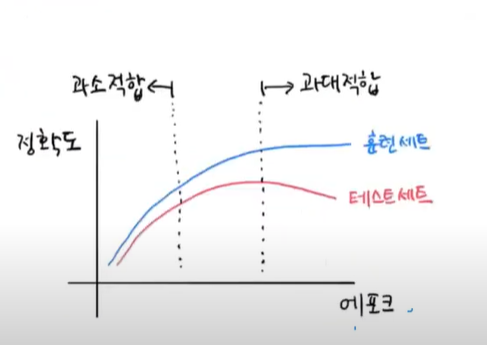

과대적합이 되기 전 중간지점에서 조기종료를 시켜주면 된다.

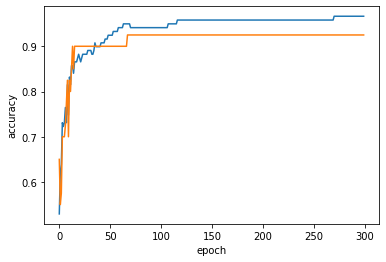

In [ ]:
import numpy as np
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()



*  fit메서드와 달리 partial_fit 메서드는 이어서 훈련하기때문에 데이터가 일부만 전달이 됐다는걸 가정으로 클래스를 지정해줘야한다.
* 적당히 100 에포크에서 조기종료를 시켜준다.

In [ ]:
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


* tol=None을 설정해서 멈추지않고 max_iter=100만큼 무조건 반복하게끔했음
* 굳 모델